In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns  
import time 
from nltk.tokenize import RegexpTokenizer  
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB 
from sklearn.pipeline import make_pipeline


In [3]:
#Loading dataset, printing first 5 rows 
phish_data= pd.read_csv("phishing_site_urls.csv")
phish_data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [4]:
#Get rows and columns
phish_data.shape
#Getting null variables 
phish_data.isnull().sum()

URL      0
Label    0
dtype: int64

<AxesSubplot:xlabel='Label', ylabel='count'>

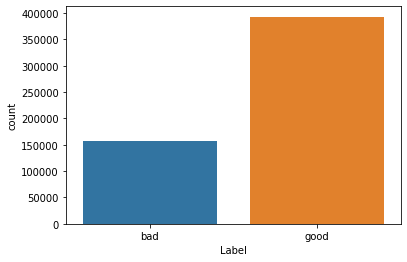

In [4]:
#Graphing good vs bad links from the dataset
sns.countplot(x="Label",data=phish_data)

In [5]:
#PREPRECESSING
#Extract tokens from string with regexpteokenizer() method
regExpTokenizer = RegexpTokenizer(r'[A-Za-z]+')
regExpTokenizer.tokenize(phish_data.URL[0])

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [6]:
# Tokenizing all rows 
t0= time.perf_counter()
phish_data['text_tokenized'] = phish_data.URL.map(lambda t: regExpTokenizer.tokenize(t))
t1 = time.perf_counter() - t0

#Printing sample
phish_data.sample(5)

,URL,Label,text_tokenized
385298,marshalldistrictlibrary.org/FilmsBasedonNovels...,good,"[marshalldistrictlibrary, org, FilmsBasedonNov..."
482414,zhangehhmd.aftablog.ir/,good,"[zhangehhmd, aftablog, ir]"
121941,olcsobb.eu/appIe-log/appstore/52ca13c92d0b10d1...,bad,"[olcsobb, eu, appIe, log, appstore, ca, c, d, ..."
88237,www.trellian.com/swolf/,good,"[www, trellian, com, swolf]"
414422,pitch.com/plog/archives/2009/06/05/ex-kctv-5-e...,good,"[pitch, com, plog, archives, ex, kctv, employe..."


In [7]:
#SNOWBALL STEMMER
snowballStemmer = SnowballStemmer("english")

#Getting stemmed words
t0= time.perf_counter()
phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [snowballStemmer.stem(word) for word in l])
t1= time.perf_counter() - t0

#Printing sample
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed
78663,www.slac.stanford.edu/~raines/tkref.html,good,"[www, slac, stanford, edu, raines, tkref, html]","[www, slac, stanford, edu, rain, tkref, html]"
213685,missionconstruction.com/index.cfm/ellerbe_beck...,good,"[missionconstruction, com, index, cfm, ellerbe...","[missionconstruct, com, index, cfm, ellerb, be..."
223689,onehundredbooks.blogspot.com/,good,"[onehundredbooks, blogspot, com]","[onehundredbook, blogspot, com]"
493841,103.245.153.70:343,bad,[],[]
314697,dipity.com/timeline/Rudy-Reyes/,good,"[dipity, com, timeline, Rudy, Reyes]","[dipiti, com, timelin, rudi, rey]"


In [8]:
#Joining stemmed words
t0= time.perf_counter()
phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0

In [9]:
#Getting bad sites and good sites into variables
bad_sites = phish_data[phish_data.Label == 'bad']
good_sites = phish_data[phish_data.Label == 'good']
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [10]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [11]:
#NOW CREATING A MODEL
cv = CountVectorizer()

#transforming text which was tokenized and stemmed
feature = cv.fit_transform(phish_data.text_sent)

#converting into array
feature[:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [12]:
#Creating train test split
trainX, testX, trainY, testY = train_test_split(feature, phish_data.Label)

#LOGISTIC REGRESSION
lr = LogisticRegression()
lr.fit(trainX,trainY)
lr.score(testX,testY)

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9626903165206754

In [13]:
scoresml = {}
scoresml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

Training Accuracy : 0.977811164319226
Testing Accuracy : 0.9626903165206754

CONFUSION MATRIX


<AxesSubplot:>

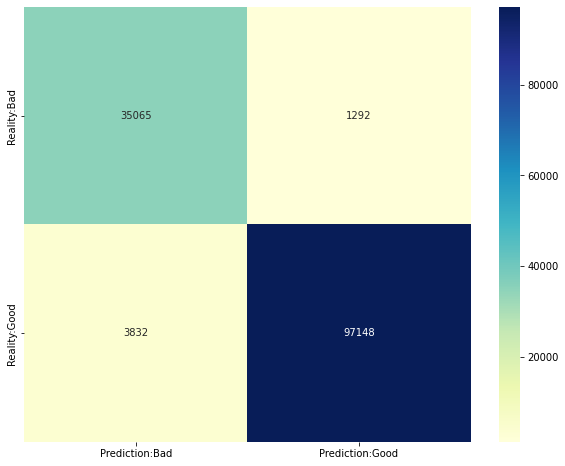

In [14]:
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Prediction:Bad', 'Prediction:Good'],
            index = ['Reality:Bad', 'Reality:Good'])

print('\nCONFUSION MATRIX')
plt.figure(figsize= (10,8))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [15]:
#MULTINOMIAL NAIVE BAYES CLASSIFIER
mnb = MultinomialNB()
mnb.fit(trainX,trainY)
mnb.score(testX,testY)

0.9560569984781959

Training Accuracy : 0.9744010446373744
Testing Accuracy : 0.9560569984781959

Printing CONFUSION MATRIX


<AxesSubplot:>

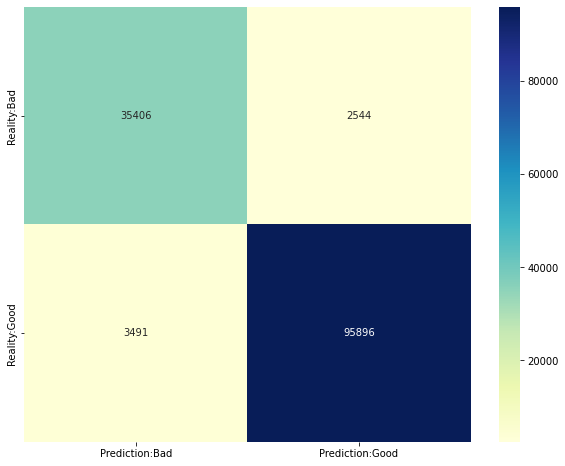

In [16]:
scoresml['NMB'] = np.round(mnb.score(testX,testY),2)
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Prediction:Bad', 'Prediction:Good'],
            index = ['Reality:Bad', 'Reality:Good'])

print('\nPrinting CONFUSION MATRIX')
plt.figure(figsize= (10,8))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Accuracy'>

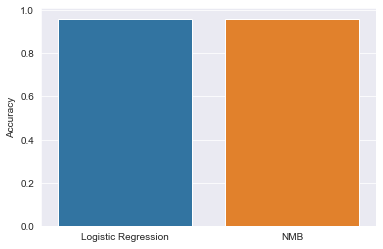

In [17]:
#Comparing logistic regression to MNB 
acc = pd.DataFrame.from_dict(scoresml,orient = 'index',columns=['Accuracy'])
sns.set_style('darkgrid')
sns.barplot(acc.index,acc.Accuracy)

In [18]:
#Data shows logistic regression is better
#Pipeline using logistic regression
pipeline_ls = make_pipeline(CountVectorizer(tokenizer  = RegexpTokenizer(r'[A-Za-z]+').tokenize, stop_words='english'), LogisticRegression())

In [19]:
trainX, testX, trainY, testY = train_test_split(phish_data.URL, phish_data.Label)
pipeline_ls.fit(trainX,trainY)
pipeline_ls.score(testX,testY)

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9669571928904811

Training Accuracy : 0.9816848661072938
Testing Accuracy : 0.9669571928904811

CONFUSION MATRIX


<AxesSubplot:>

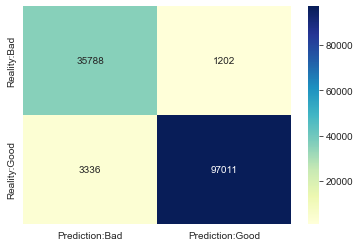

In [20]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Prediction:Bad', 'Prediction:Good'],
            index = ['Reality:Bad', 'Reality:Good'])

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

Getting 96.6% testing accuracy